# Центральная предельная теорема своими руками

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import math

# Распределение Лапласа

In [107]:
#вытаскиваем мат. ожидания и дисперсии из scipy.stats для распределения лапласа для loc(сдвига)=1 и scale(масштабирвоания)=3

mean, var  = sts.laplace.stats(moments='mv',loc=1,scale=3)
std = sts.laplace.std(loc=1,scale=3) # ст. отклонение
print("мат ожидание: "+str(mean))
print("дисперсия: "+str(var))

мат ожидание: 1.0
дисперсия: 18.0


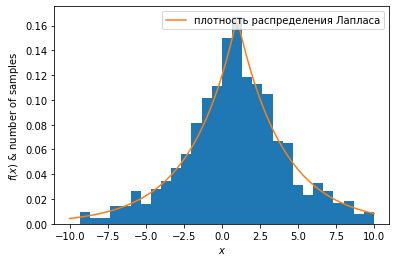

In [109]:
#генерируем выборки в  1000 элементов
laplace_dist = sts.laplace(loc=1,scale=3)#задаем функцию с параметрами loc=1, scale=3
sample = laplace_dist.rvs(1000)#генерим случайную выборку 1000 значений
#print(sample)
x = np.linspace(-10,10,1000)#определяем область определения для плонтости рапсределения
laplace_pdf = laplace_dist.pdf(x)#вычисляем значения плотности распределения от выборки
#строим гистрограмму + теоретическую функцию распределения
plt.hist(sample, bins =30, range=(-10,10), density=True)
plt.plot(x, laplace_pdf, label='плотность распределения Лапласа')
plt.ylabel('$f(x)$ & number of samples')
plt.xlabel('$x$')
plt.legend(loc='best')

# Оценка распределения выборочного среднего сл. велечины  при выборках разного объема


In [110]:
#функция осуществляющая построение графика плотности распр. и гистограммы
def calculation(n):
    x = np.linspace(-10,10,1000)
    sample_mean=np.array([])#массив для выборочных средних
    #генерируем выборочные средние
    for i in range (0,1000):
        sample = sts.laplace_dist.rvs(n)
        mean = sum(sample)/n
        sample_mean=np.append(sample_mean,mean)
    #определим параметры нормального распределения описывающие массив 1000 в.с. для n
    Dn=var/n#дисперсия для нормального распределения приближающего выборку средних согласно ЦПТ
    std=math.sqrt(Dn)#стандартное отклонение для нормального распределения выборки средних
    norm_dist = sts.norm(mean, std)#определяем нормальное распределение для распределения Лапласа
    pdf = norm_dist.pdf(x)#получаем плотность распределения
    
    #строим гистограмму массива средних для n и плотность
    plt.hist(sample_mean, bins =60, range=(-10,10), density=True)
    plt.plot(x, pdf, label='плотн. распр для n='+str(n))
    plt.ylabel('$pdf(x)$ & number of samples')
    plt.xlabel('$x$')
    plt.legend(loc='best')


## при n = 5

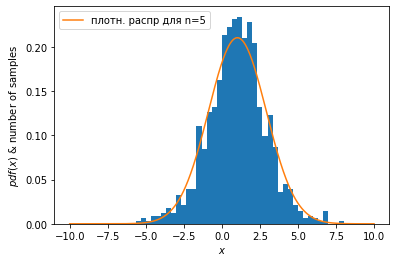

In [102]:
calculation(5)

## при n = 10

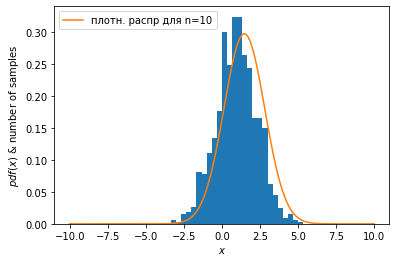

In [94]:
calculation(10)

## при n = 50

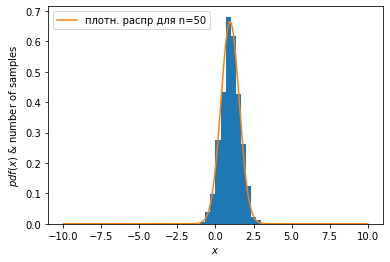

In [105]:
calculation(50)

## при n=500

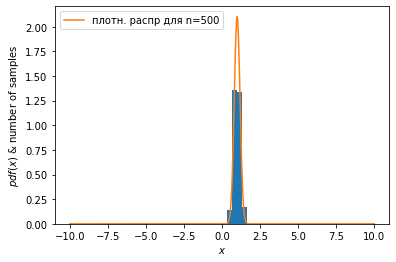

In [104]:
calculation(500)

По полученным графикам наблюдается увелечение точности апроксимации выборочных средних непрерывной случайной величины, которая описывается распределением Лапласа. При меньших n гистограмма подвержена большим колебаниям относительно плотности распределения, но чем больше n, тем меньше заметны данные отклонения. Наиболее качественный результат наблюдается при больших n(при n>50).